# 목표 
- 배송 정보 데이터를 학습하여 정시 배송과, 지연 배송 구분

## 머신러닝의 전체 과정 
 - 문제 정의 
 - 데이터 수집 
 - 데이터 전처리 
 - EDA : 탐색적 데이터 분석 
 - 모델 선택 및 학습 
 - 모델 평가 

### 문제 정의 
- 정시 배송과 지연 배송 구분 
- keggle에서 높은 점수 차지 

In [1]:
# 파이썬 import
!pip install missingno
import pandas as pd   #판다스 데이터프레임 
import numpy as np   #넘파이 배열 
from matplotlib import pyplot as plt     #그래프 
import warnings 
import seaborn as sns # 시각화 라이브러리 
warnings.filterwarnings("ignore")

### 데이터 수집 
- kaggle 사이트로부터 train/ test 다운로드 


In [2]:
train=pd.read_csv("./data/Train.csv", index_col='ID')
test=pd.read_csv("./data/test.csv", index_col="ID")

In [3]:
pd.set_option("display.max_column", None)
pd.set_option('display.max_row', None)

### 데이터 전처리

### Mode_of_Shipment 전전처리

In [4]:
train["Mode_of_Shipment"]=train["Mode_of_Shipment"].replace(" Ship", "Ship")   #오타 제거 후 라벨인코딩 
train["Mode_of_Shipment"]=train["Mode_of_Shipment"].replace(" Flight", "Flight")
train["Mode_of_Shipment"]=train["Mode_of_Shipment"].replace(" Road", "Road")
train["Mode_of_Shipment"]=train["Mode_of_Shipment"].replace(" Shipzk", "Ship")
train["Mode_of_Shipment"]=train["Mode_of_Shipment"].replace(" Flightzk", "Flight")
train["Mode_of_Shipment"]=train["Mode_of_Shipment"].replace(" Roadzk", "Road")
train["Mode_of_Shipment"]=train["Mode_of_Shipment"].replace("?", None)
train["Mode_of_Shipment"]=train["Mode_of_Shipment"].replace("Ship", 0)   
train["Mode_of_Shipment"]=train["Mode_of_Shipment"].replace("Flight", 1)
train["Mode_of_Shipment"]=train["Mode_of_Shipment"].replace("Road", 2) #배 0, 비행기 1, 차 2
train["Mode_of_Shipment"]= train["Mode_of_Shipment"].astype("float64")

In [5]:
train["Mode_of_Shipment"].unique()

array([ 0.,  1.,  2., nan])

In [6]:
test["Mode_of_Shipment"].unique() 

array([' Ship', ' Flight', '?', ' Road', ' Shipzk', ' Roadzk'],
      dtype=object)

In [7]:
test["Mode_of_Shipment"]=test["Mode_of_Shipment"].replace(" Ship", "Ship")   #오타 제거 후 라벨인코딩 
test["Mode_of_Shipment"]=test["Mode_of_Shipment"].replace(" Flight", "Flight")
test["Mode_of_Shipment"]=test["Mode_of_Shipment"].replace(" Road", "Road")
test["Mode_of_Shipment"]=test["Mode_of_Shipment"].replace(" Shipzk", "Ship")
test["Mode_of_Shipment"]=test["Mode_of_Shipment"].replace(" Flightzk", "Flight")
test["Mode_of_Shipment"]=test["Mode_of_Shipment"].replace(" Roadzk", "Road")
test["Mode_of_Shipment"]=test["Mode_of_Shipment"].replace("?", None)

In [8]:
test["Mode_of_Shipment"]=test["Mode_of_Shipment"].replace("Ship", 0)   
test["Mode_of_Shipment"]=test["Mode_of_Shipment"].replace("Flight", 1)
test["Mode_of_Shipment"]=test["Mode_of_Shipment"].replace("Road", 2) 

In [9]:
test["Mode_of_Shipment"]= test["Mode_of_Shipment"].astype("float64")

### Warehouse_block 타입변경

In [10]:
train["Warehouse_block"]=train["Warehouse_block "].str.strip()

In [11]:
del train["Warehouse_block "]

In [12]:
test["Warehouse_block"]=test["Warehouse_block "].str.strip()

In [13]:
del test["Warehouse_block "]

In [14]:
train= train[["Warehouse_block", "Mode_of_Shipment", 'Customer_care_calls', 'Customer_rating', 
              "Cost_of_the_Product", "Prior_purchases", "Product_importance", "Gender", "Discount_offered",
              "Weight_in_gms","Reached.on.Time_Y.N"
              ]]

In [15]:
test= test[["Warehouse_block", "Mode_of_Shipment", 'Customer_care_calls', 'Customer_rating', 
              "Cost_of_the_Product", "Prior_purchases", "Product_importance", "Gender", "Discount_offered",
              "Weight_in_gms"
              ]]

In [16]:
train["Warehouse_block"]=train["Warehouse_block"].replace("A", 0)
train["Warehouse_block"]=train["Warehouse_block"].replace("B", 1)
train["Warehouse_block"]=train["Warehouse_block"].replace("C", 2)
train["Warehouse_block"]=train["Warehouse_block"].replace("D", 3)
train["Warehouse_block"]=train["Warehouse_block"].replace("F", 4)

In [17]:
train["Warehouse_block"]= train["Warehouse_block"].astype("int64")

In [18]:
test["Warehouse_block"]=test["Warehouse_block"].replace("A", 0)
test["Warehouse_block"]=test["Warehouse_block"].replace("B", 1)
test["Warehouse_block"]=test["Warehouse_block"].replace("C", 2)
test["Warehouse_block"]=test["Warehouse_block"].replace("D", 3)
test["Warehouse_block"]=test["Warehouse_block"].replace("F", 4)
test["Warehouse_block"]= test["Warehouse_block"].astype("int64")

### Customer_care_calls 타입, 전처리 보류

In [19]:
train["Customer_care_calls"].unique()

array([ 2.,  5.,  3., nan,  4.,  6.,  7.])

### Customer_rating 전전처리 

In [20]:
train["Customer_rating"].unique()

array([ 2,  3,  1,  5,  4, 99], dtype=int64)

In [21]:
train["Customer_rating"].median()

3.0

In [22]:
train["Customer_rating"]= train["Customer_rating"].replace(99, 3) # 결측치 99 ---> 3으로 바꿈(중앙값인),, 

In [23]:
train["Customer_rating"].unique()

array([2, 3, 1, 5, 4], dtype=int64)

In [24]:
test["Customer_rating"].unique()

array([ 1,  4,  5,  2,  3, 99], dtype=int64)

In [25]:
test["Customer_rating"].median()

3.0

### Cost_of_the_Product 전전처리 

In [27]:

train_9999 = train[train["Cost_of_the_Product"]==9999].index
train_9999

Int64Index([112, 6256, 6613], dtype='int64', name='ID')

In [28]:
train[train["Cost_of_the_Product"]==9999]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
112,2,0.0,3.0,2,9999,4.0,medium,F,NaN,1322,1
6256,1,0.0,2.0,2,9999,4.0,medium,M,NaN,4066,0
6613,4,1.0,4.0,4,9999,3.0,medium,F,NaN,5555,1


In [29]:
train["Cost_of_the_Product"]=train["Cost_of_the_Product"].replace(9999, 214)

In [30]:
test["Cost_of_the_Product"]=test["Cost_of_the_Product"].replace(9999, 214)

In [31]:
test["Cost_of_the_Product"]=test["Cost_of_the_Product"].replace(9999, 214)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   int64  
 1   Mode_of_Shipment     6626 non-null   float64
 2   Customer_care_calls  5423 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 656.2+ KB


### product_importance 전전처리 

In [33]:

train["Product_importance"]=train["Product_importance"].replace("mediumm", "medium")
train["Product_importance"]=train["Product_importance"].replace("loww", "low")
train["Product_importance"]=train["Product_importance"].replace("highh", "high")
train["Product_importance"]=train["Product_importance"].replace("?", None)

In [34]:
train["Product_importance"].value_counts()

low       3345
medium    2983
high       574
Name: Product_importance, dtype: int64

In [35]:
train["Product_importance"]=train["Product_importance"].replace("medium", 1)
train["Product_importance"]=train["Product_importance"].replace("high", 2)
train["Product_importance"]=train["Product_importance"].replace("low", 0)

In [36]:
# 타입변경 

train["Product_importance"]=train["Product_importance"].astype("float64")

In [37]:
test["Product_importance"].value_counts()

low        1873
medium     1685
high        361
?            80
mediumm       1
Name: Product_importance, dtype: int64

In [38]:
test["Product_importance"]=test["Product_importance"].replace("mediumm", 1)
test["Product_importance"]=test["Product_importance"].replace("high", 2)
test["Product_importance"]=test["Product_importance"].replace("low", 0)
test["Product_importance"]=test["Product_importance"].replace("medium", 1)
test["Product_importance"]=test["Product_importance"].replace("?", None)

### gender 전전처리 

In [39]:
train["Gender"].value_counts()
train["Gender"]=train["Gender"].replace("M", 0)
train["Gender"]=train["Gender"].replace("F", 1)
train["Gender"]=train["Gender"].astype("int64")


In [40]:
train["Gender"].value_counts()

0    3509
1    3490
Name: Gender, dtype: int64

In [41]:
test["Gender"].value_counts()
test["Gender"]=test["Gender"].replace("M", 0)
test["Gender"]=test["Gender"].replace("F", 1)
test["Gender"]=test["Gender"].astype("int64")

### 무게 전전처리 ?제거 후 타입변경

In [42]:
train["Weight_in_gms"]=train["Weight_in_gms"].replace("?", None)
train["Weight_in_gms"]=train["Weight_in_gms"].astype("float64")

In [43]:
test["Weight_in_gms"]=test["Weight_in_gms"].replace("?", None)
test["Weight_in_gms"]=test["Weight_in_gms"].astype("float64")

In [44]:
train["Discount_offered"].unique()

array([nan,  6.,  2.,  9.,  3., 34.,  7.,  1., 53.,  8., 63.,  4., 43.,
       60., 51.,  5., 10., 55., 17., 62., 15., 23., 38., 32., 39., 29.,
       45., 14., 52., 41., 58., 11., 50., 35., 28., 31., 24., 64., 61.,
       48., 65., 40., 18., 22., 56., 49., 21., 27., 20., 13., 30., 26.,
       54., 16., 57., 47., 42., 36., 37., 46., 19., 12., 25., 44., 33.,
       59.])

In [45]:
######  오타, 이상치 제거#########################################

In [46]:
####### 특성공학  카테고리화 -------------------

In [47]:
# 무게 범주화시키기 
bins = [1000,2000,4000, 8000]
labels = ["1001~2000", "2001~4000", "4001~"]
train["Weight_label"]= pd.cut(train["Weight_in_gms"], bins, labels=labels)

In [48]:
bins = [1000,2000,4000, 8000]
labels = ["1001~2000", "2001~4000", "4001~"]
test["Weight_label"]= pd.cut(test["Weight_in_gms"], bins, labels=labels)

<AxesSubplot:xlabel='Weight_label', ylabel='count'>

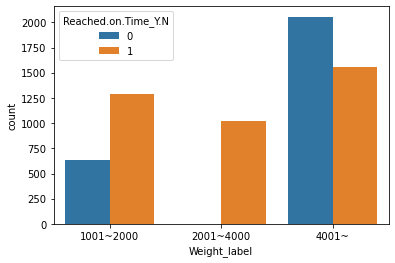

In [49]:
sns.countplot(data=train, x= "Weight_label", hue = "Reached.on.Time_Y.N")

In [50]:
# 범주지정 

In [51]:
bins = [0,9,10,70]
labels = ["10미만","10","11이상"]
train["Discount_label"]= pd.cut(train["Discount_offered"], bins, labels=labels)


In [52]:
bins = [0,9,10,70]
labels = ["10미만","10","11이상"]
test["Discount_label"]= pd.cut(test["Discount_offered"], bins, labels=labels)


<AxesSubplot:xlabel='Discount_label', ylabel='count'>

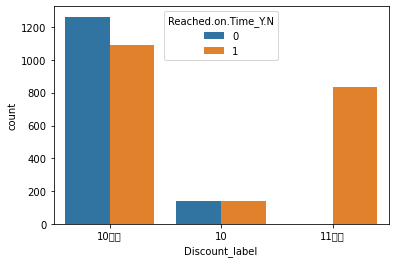

In [53]:
sns.countplot(data=train, x= "Discount_label", hue = "Reached.on.Time_Y.N")

In [54]:
bins = [95,170,210,280,310]        #bins = [95,169,210,280,310]
labels = [0, 1, 2, 3]
train["Cost_label"]= pd.cut(train["Cost_of_the_Product"], bins, labels=labels)

In [55]:
bins = [95,170,210,280,310]        #bins = [95,169,210,280,310]
labels = [0, 1, 2, 3]
test["Cost_label"]= pd.cut(test["Cost_of_the_Product"], bins, labels=labels)

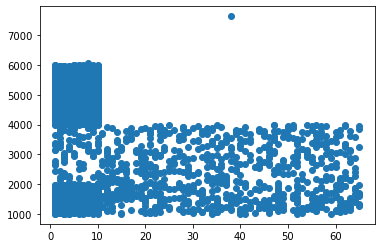

In [56]:
plt.scatter(train["Discount_offered"], train["Weight_in_gms"] )
# 0~ 10 무게 1000~2000에 모여있고   4000~6000에 모여있음 
# weight 7000이상에서 -> 이상치 발견 

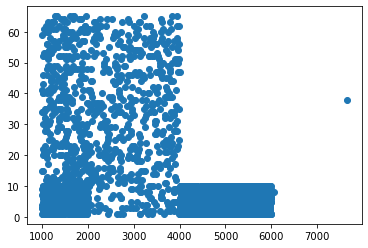

In [57]:
plt.scatter(train["Weight_in_gms"], train["Discount_offered"] )
# 0~ 10 무게 1000~2000에 모여있고   4000~6000에 모여있음 
# weight 7000이상에서 -> 이상치 발견 

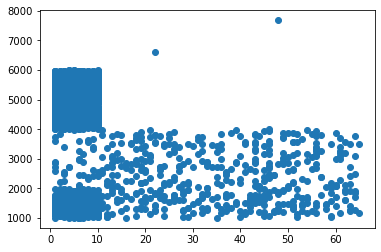

In [58]:
plt.scatter(test["Discount_offered"], test["Weight_in_gms"] )
# 0~ 10 무게 1000~2000에 모여있고   4000~6000에 모여있음 
# weight 7000이상에서 -> 이상치 발견 

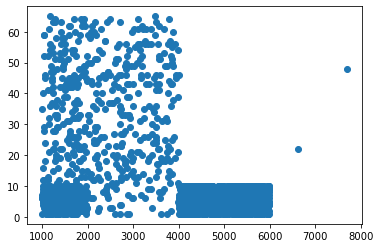

In [59]:
plt.scatter(test["Weight_in_gms"], test["Discount_offered"] )
# 0~ 10 무게 1000~2000에 모여있고   4000~6000에 모여있음 
# weight 7000이상에서 -> 이상치 발견 

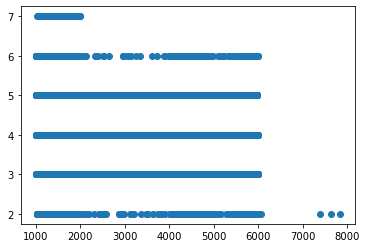

In [60]:
plt.scatter(train["Weight_in_gms"], train["Customer_care_calls"] )
# 0~ 10 무게 1000~2000에 모여있고   4000~6000에 모여있음 
# weight 7000이상에서 -> 이상치 발견 
# 4000~6000은 할인율 1~10사이의 값, 

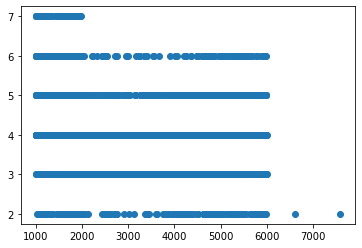

In [61]:
plt.scatter(test["Weight_in_gms"], test["Customer_care_calls"] )
# 0~ 10 무게 1000~2000에 모여있고   4000~6000에 모여있음 
# weight 7000이상에서 -> 이상치 발견 
# 4000~6000은 할인율 1~10사이의 값, 

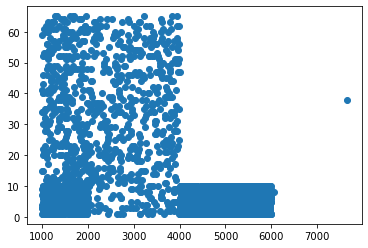

In [62]:
plt.scatter(train["Weight_in_gms"], train["Discount_offered"] )
# 0~ 10 무게 1000~2000에 모여있고   4000~6000에 모여있음 
# weight 7000이상에서 -> 이상치 발견 
# 4000~6000은 할인율 1~10사이의 값, 

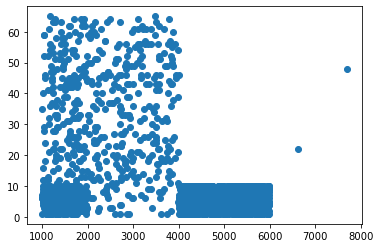

In [63]:
plt.scatter(test["Weight_in_gms"], test["Discount_offered"] )
# 0~ 10 무게 1000~2000에 모여있고   4000~6000에 모여있음 
# weight 7000이상에서 -> 이상치 발견 
# 4000~6000은 할인율 1~10사이의 값, 

In [64]:
# 이상값 조정 weight 
weight_train_strange=train[train["Weight_in_gms"]>=6300].index

In [65]:
weight_train_strange

Int64Index([754, 4484, 6370], dtype='int64', name='ID')

In [66]:
train[(train["Weight_in_gms"]>=1000) & (train["Weight_in_gms"]<=4000)].median() 

Warehouse_block           2.0
Mode_of_Shipment          0.0
Customer_care_calls       4.0
Customer_rating           3.0
Cost_of_the_Product     229.0
Prior_purchases           4.0
Product_importance        0.0
Gender                    1.0
Discount_offered         12.0
Weight_in_gms          1754.0
Reached.on.Time_Y.N       1.0
dtype: float64

In [67]:
train["Weight_in_gms"][weight_train_strange] = 1754  ##  train 이상치 중앙값 변경 

In [68]:
weight_test_strange=test[test["Weight_in_gms"]>=6300].index

In [69]:
test[(test["Weight_in_gms"]>=1000) & (test["Weight_in_gms"]<=4000)].median()

Warehouse_block           2.0
Mode_of_Shipment          0.0
Customer_care_calls       4.0
Customer_rating           3.0
Cost_of_the_Product     231.0
Prior_purchases           4.0
Product_importance        0.0
Gender                    1.0
Discount_offered         13.0
Weight_in_gms          1756.0
dtype: float64

In [70]:
test["Weight_in_gms"][weight_test_strange] = 1756 ##  test 이상치 중앙값 변경 

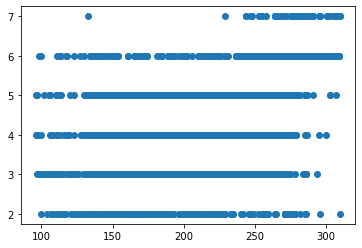

In [71]:
plt.scatter(test["Cost_of_the_Product"], test["Customer_care_calls"] )
# 0~ 10 무게 1000~2000에 모여있고   4000~6000에 모여있음 
# weight 7000이상에서 -> 이상치 발견 
# 4000~6000은 할인율 1~10사이의 값, 

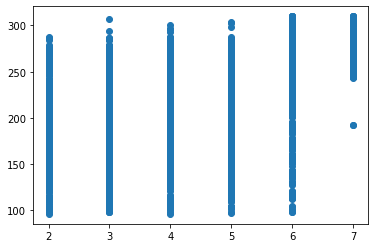

In [72]:
plt.scatter(train["Customer_care_calls"], train["Cost_of_the_Product"] )

In [73]:
# cost the product 이상값 조정  --- 다 중앙값으로하자 

cost_train_strange=train[(train["Cost_of_the_Product"]<200) & (train["Customer_care_calls"]==7)].index



In [74]:
cost_train_strange

Int64Index([2481, 5967], dtype='int64', name='ID')

In [75]:
train[train["Customer_care_calls"]==7].median()
train["Cost_of_the_Product"][cost_train_strange] = 281

In [76]:
cost_train_strange_2=train[(train["Cost_of_the_Product"]>300) & (train["Customer_care_calls"]==3)].index

In [77]:
train[train["Customer_care_calls"]==3].describe()
train["Cost_of_the_Product"][cost_train_strange_2] = 197

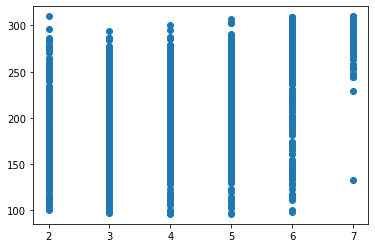

In [78]:
plt.scatter(test["Customer_care_calls"], test["Cost_of_the_Product"] )

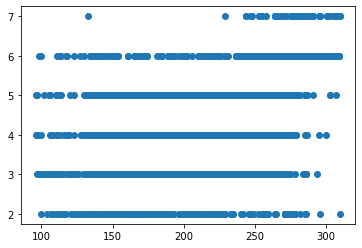

In [79]:
plt.scatter(test["Cost_of_the_Product"], test["Customer_care_calls"] )
# 0~ 10 무게 1000~2000에 모여있고   4000~6000에 모여있음 
# weight 7000이상에서 -> 이상치 발견 
# 4000~6000은 할인율 1~10사이의 값, 

In [80]:
cost_test_strange=test[(test["Cost_of_the_Product"]<230) & (test["Customer_care_calls"]==7)].index

In [81]:
cost_test_strange

Int64Index([7944, 9107], dtype='int64', name='ID')

In [82]:
test[test["Customer_care_calls"]==7].describe()
test["Cost_of_the_Product"][cost_test_strange] = 284


In [83]:
cost_test_strange_2=test[(test["Cost_of_the_Product"]>300) & (test["Customer_care_calls"]==2)].index


In [84]:
test["Cost_of_the_Product"][cost_test_strange_2]=186

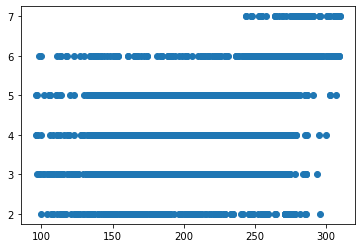

In [85]:
plt.scatter(test["Cost_of_the_Product"], test["Customer_care_calls"] )


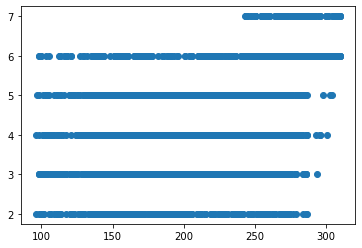

In [86]:
plt.scatter(train["Cost_of_the_Product"], train["Customer_care_calls"] )
 

### 결측치 채워넣기 시작!!!!

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Warehouse_block      6999 non-null   int64   
 1   Mode_of_Shipment     6626 non-null   float64 
 2   Customer_care_calls  5423 non-null   float64 
 3   Customer_rating      6999 non-null   int64   
 4   Cost_of_the_Product  6999 non-null   int64   
 5   Prior_purchases      6049 non-null   float64 
 6   Product_importance   6902 non-null   float64 
 7   Gender               6999 non-null   int64   
 8   Discount_offered     3468 non-null   float64 
 9   Weight_in_gms        6553 non-null   float64 
 10  Reached.on.Time_Y.N  6999 non-null   int64   
 11  Weight_label         6553 non-null   category
 12  Discount_label       3468 non-null   category
 13  Cost_label           6999 non-null   category
dtypes: category(3), float64(6), int64(5)
memory usage: 935.2 KB


In [88]:
train.corr() #### 고정 

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,1.000000,-0.001282,0.017966,0.000712,-0.003198,-0.007731,0.001846,-0.001708,0.007231,0.001671,-0.003872
Mode_of_Shipment,-0.001282,1.000000,0.025784,-0.004228,0.009972,0.024465,0.016660,-0.000619,-0.001680,-0.005418,0.001572
Customer_care_calls,0.017966,0.025784,1.000000,0.012224,0.336735,0.173709,-0.065189,-0.001372,-0.158465,-0.281280,-0.070266
Customer_rating,0.000712,-0.004228,0.012224,1.000000,0.006108,0.015173,0.004209,0.006883,-0.016456,0.005591,0.001127
Cost_of_the_Product,-0.003198,0.009972,0.336735,0.006108,1.000000,0.127962,-0.048466,-0.014507,-0.139349,-0.132379,-0.067933
Prior_purchases,-0.007731,0.024465,0.173709,0.015173,0.127962,1.000000,0.018570,0.007065,-0.081868,-0.168850,-0.065160
Product_importance,0.001846,0.016660,-0.065189,0.004209,-0.048466,0.018570,1.000000,-0.014228,0.029923,0.100074,0.020394
Gender,-0.001708,-0.000619,-0.001372,0.006883,-0.014507,0.007065,-0.014228,1.000000,-0.006405,-0.002339,0.000378
Discount_offered,0.007231,-0.001680,-0.158465,-0.016456,-0.139349,-0.081868,0.029923,-0.006405,1.000000,-0.371156,0.397393
Weight_in_gms,0.001671,-0.005418,-0.281280,0.005591,-0.132379,-0.168850,0.100074,-0.002339,-0.371156,1.000000,-0.267538


In [89]:
#  WEIGHT 결측치 채우기 시작 


### 결측값 채워주기 시작 weight부터 

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Warehouse_block      6999 non-null   int64   
 1   Mode_of_Shipment     6626 non-null   float64 
 2   Customer_care_calls  5423 non-null   float64 
 3   Customer_rating      6999 non-null   int64   
 4   Cost_of_the_Product  6999 non-null   int64   
 5   Prior_purchases      6049 non-null   float64 
 6   Product_importance   6902 non-null   float64 
 7   Gender               6999 non-null   int64   
 8   Discount_offered     3468 non-null   float64 
 9   Weight_in_gms        6553 non-null   float64 
 10  Reached.on.Time_Y.N  6999 non-null   int64   
 11  Weight_label         6553 non-null   category
 12  Discount_label       3468 non-null   category
 13  Cost_label           6999 non-null   category
dtypes: category(3), float64(6), int64(5)
memory usage: 935.2 KB


In [91]:
train.corr()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,1.000000,-0.001282,0.017966,0.000712,-0.003198,-0.007731,0.001846,-0.001708,0.007231,0.001671,-0.003872
Mode_of_Shipment,-0.001282,1.000000,0.025784,-0.004228,0.009972,0.024465,0.016660,-0.000619,-0.001680,-0.005418,0.001572
Customer_care_calls,0.017966,0.025784,1.000000,0.012224,0.336735,0.173709,-0.065189,-0.001372,-0.158465,-0.281280,-0.070266
Customer_rating,0.000712,-0.004228,0.012224,1.000000,0.006108,0.015173,0.004209,0.006883,-0.016456,0.005591,0.001127
Cost_of_the_Product,-0.003198,0.009972,0.336735,0.006108,1.000000,0.127962,-0.048466,-0.014507,-0.139349,-0.132379,-0.067933
Prior_purchases,-0.007731,0.024465,0.173709,0.015173,0.127962,1.000000,0.018570,0.007065,-0.081868,-0.168850,-0.065160
Product_importance,0.001846,0.016660,-0.065189,0.004209,-0.048466,0.018570,1.000000,-0.014228,0.029923,0.100074,0.020394
Gender,-0.001708,-0.000619,-0.001372,0.006883,-0.014507,0.007065,-0.014228,1.000000,-0.006405,-0.002339,0.000378
Discount_offered,0.007231,-0.001680,-0.158465,-0.016456,-0.139349,-0.081868,0.029923,-0.006405,1.000000,-0.371156,0.397393
Weight_in_gms,0.001671,-0.005418,-0.281280,0.005591,-0.132379,-0.168850,0.100074,-0.002339,-0.371156,1.000000,-0.267538


<AxesSubplot:xlabel='Weight_label', ylabel='count'>

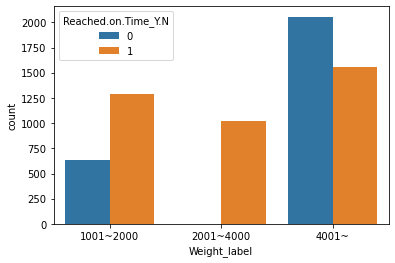

In [92]:
sns.countplot(data=train, x= "Weight_label", hue = "Reached.on.Time_Y.N")

<AxesSubplot:xlabel='Discount_label', ylabel='count'>

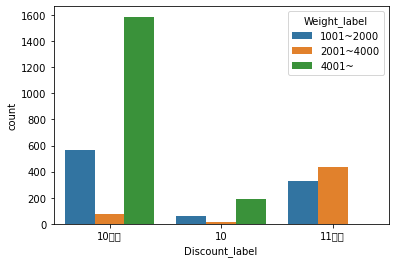

In [93]:
sns.countplot(data=train, x= "Discount_label", hue = "Weight_label")

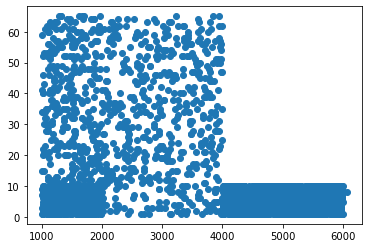

In [94]:
plt.scatter(train["Weight_in_gms"], train["Discount_offered"] )

<AxesSubplot:xlabel='Weight_label', ylabel='count'>

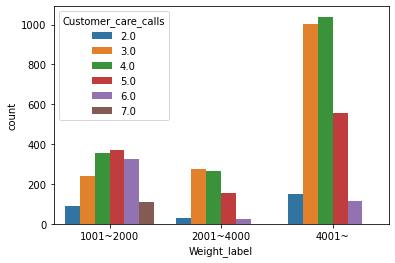

In [95]:
sns.countplot(data=train, x= "Weight_label", hue = "Customer_care_calls")

<AxesSubplot:xlabel='Customer_care_calls', ylabel='count'>

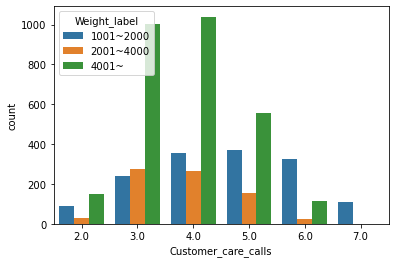

In [96]:
sns.countplot(data=train, x= "Customer_care_calls", hue = "Weight_label")

In [97]:
#  전화가 7이상에는 1001~2000 무게밖에 없다. ok 


# 무게가 2001~4000 ---> 무조건 늦게 배송된다.  ------ 결과값


#  무게가 4001이상 -----> 무조건 10%이하  //  ---- 할인율 뽑을때 



#  할인율 2001~4000무게는 10미만, or 11이상이지만 --> 11이상에 대다수 분포한다. 10에는 절대 없다. 
# 11이상 이면 2001~4000

In [98]:
train_weigth0 = train[(train["Customer_care_calls"]==7) & (train["Weight_in_gms"].isnull())].index

In [99]:
train_weigth0 

Int64Index([815, 1090, 1738, 2811, 5239, 6890], dtype='int64', name='ID')

In [100]:
train[(train["Customer_care_calls"]==7)]["Weight_in_gms"].median() 

1540.0

In [101]:
train["Weight_in_gms"][train_weigth0]=1540

In [102]:
test_weigth0 = test[(test["Customer_care_calls"]==7) & (test["Weight_in_gms"].isnull())].index

In [103]:
test_weigth0

Int64Index([7067, 7206, 7769, 7947, 8011, 8979, 10876], dtype='int64', name='ID')

In [104]:
test[(test["Customer_care_calls"]==7)]["Weight_in_gms"].median() 

1480.0

In [105]:
test["Weight_in_gms"][test_weigth0]=1480

In [106]:
train_weight1=train[(train["Discount_offered"]<10) & (train["Weight_in_gms"].isnull())].index  # 중앙값

In [107]:
train_weight1

Int64Index([  48,  132,  159,  249,  374,  399,  418,  495,  575,  593,
            ...
            6172, 6178, 6191, 6200, 6233, 6409, 6482, 6664, 6806, 6846],
           dtype='int64', name='ID', length=121)

In [108]:
train[(train["Discount_offered"]<10)]["Weight_in_gms"].median() 

4567.5

In [109]:
train["Weight_in_gms"][train_weight1]=4568

In [110]:
test_weight1=test[(test["Discount_offered"]<10) & (test["Weight_in_gms"].isnull())].index  # 중앙값

In [111]:
test_weight1

Int64Index([ 7110,  7161,  7225,  7273,  7303,  7460,  7480,  7535,  7661,
             7782,  7800,  7811,  7814,  7827,  7837,  7873,  7879,  7933,
             7963,  7971,  7979,  7981,  8014,  8021,  8061,  8105,  8231,
             8431,  8441,  8475,  8506,  8610,  8652,  8662,  8680,  8758,
             8848,  8849,  8880,  8914,  8971,  9002,  9126,  9270,  9313,
             9349,  9485,  9541,  9555,  9598,  9617,  9627,  9686,  9733,
             9763,  9773,  9847,  9940, 10007, 10131, 10187, 10242, 10284,
            10286, 10289, 10338, 10344, 10406, 10426, 10563, 10568, 10609,
            10616, 10662, 10695, 10697, 10807, 10810, 10899, 10908],
           dtype='int64', name='ID')

In [112]:
test[(test["Discount_offered"]<10)]["Weight_in_gms"].median() 

4623.5

In [113]:
test["Weight_in_gms"][test_weight1]=4624

In [114]:
train_weight2=train[(train["Discount_offered"]==10) & (train["Weight_in_gms"].isnull())].index

In [115]:
train_weight2

Int64Index([524, 634, 978, 2153, 2292, 2724, 3086, 3604, 3738, 4104, 4241,
            5068],
           dtype='int64', name='ID')

In [116]:
train[(train["Discount_offered"]==10)]["Weight_in_gms"].median()

4642.0

In [117]:
train["Weight_in_gms"][train_weight2]=4642

In [118]:
test_weight2=test[(test["Discount_offered"]==10) & (test["Weight_in_gms"].isnull())].index

In [119]:
test_weight2

Int64Index([7292, 7639, 7738, 8393, 8616, 9203, 10050, 10729], dtype='int64', name='ID')

In [120]:
test[(test["Discount_offered"]==10)]["Weight_in_gms"].median()

4498.0

In [121]:
test["Weight_in_gms"][test_weight2]=4498

In [122]:
train_weight3=train[(train["Discount_offered"]>10) & (train["Weight_in_gms"].isnull())].index

In [123]:
train_weight3

Int64Index([  83,  110,  259,  401,  599,  832,  866,  937, 1036, 1085, 1264,
            1300, 1325, 1444, 1481, 1518, 1555, 1637, 1664, 1740, 1804, 1829,
            1941, 2007, 2090, 2135, 2192, 2475, 2506, 2680, 2828, 3115, 3608,
            3679, 4053, 4061, 4373, 4379, 4422, 4425, 4444, 4577, 4659, 4675,
            4729, 4851, 4958, 5160, 5343, 5352, 5467, 5469, 5482, 5878, 6073,
            6179, 6197, 6340, 6400, 6417, 6426, 6475, 6523, 6557, 6602, 6626,
            6788, 6823, 6973],
           dtype='int64', name='ID')

In [124]:
train[(train["Discount_offered"]>10)]["Weight_in_gms"].median()

2228.0

In [125]:
train["Weight_in_gms"][train_weight3]=2228

In [126]:
test_weight3=test[(test["Discount_offered"]>10) & (test["Weight_in_gms"].isnull())].index

In [127]:
test_weight3

Int64Index([ 7005,  7213,  7255,  7357,  7514,  7555,  7631,  7787,  7888,
             7948,  7951,  8009,  8017,  8042,  8092,  8136,  8326,  8330,
             8333,  8337,  8348,  8374,  8388,  8453,  8617,  8618,  8717,
             8757,  8787,  8809,  8821,  8865,  8958,  8976,  9142,  9223,
             9289,  9306,  9545,  9726,  9805,  9828,  9900,  9978,  9981,
            10023, 10038, 10066, 10150, 10223, 10238, 10328, 10507, 10589,
            10671, 10736, 10844, 10877, 10896, 10933],
           dtype='int64', name='ID')

In [128]:
test[(test["Discount_offered"]>10)]["Weight_in_gms"].median()

2218.0

In [129]:
test["Weight_in_gms"][test_weight3]=2218

In [130]:
train["Weight_in_gms"]=train["Weight_in_gms"].fillna(value=4199)

In [131]:
test["Weight_in_gms"].median()

4157.0

In [132]:
test["Weight_in_gms"]=test["Weight_in_gms"].fillna(value=4157)

In [133]:
# 무게 2000~ 4000 라인 -> 금액이 175~275 대에만 있다 

In [134]:
call3_Weight_0_0= train[(train["Customer_care_calls"].isnull()) & (train["Weight_in_gms"]>=1000)& (train["Cost_label"]==0) & (train["Weight_in_gms"]<=2000)].index
call3_Weight_1_0= train[(train["Customer_care_calls"].isnull()) & (train["Weight_in_gms"]>=2001)& (train["Cost_label"]==0)& (train["Weight_in_gms"]<=4000)].index
call4_Weight_2= train[(train["Customer_care_calls"].isnull()) & (train["Weight_in_gms"]>=4001)].index
call4_Weight_0= train[(train["Customer_care_calls"].isnull()) & (train["Weight_in_gms"]>=1000)& (train["Weight_in_gms"]<=2000)&(train["Cost_label"]<=1)].index
call4_Weight_1_1= train[(train["Customer_care_calls"].isnull()) & (train["Weight_in_gms"]>=2001)&(train["Weight_in_gms"]<=4000)&(train["Cost_label"]==1)].index
call4_Weight_1_2= train[(train["Customer_care_calls"].isnull()) & (train["Weight_in_gms"]>=2001)&(train["Weight_in_gms"]<=4000)& (train["Cost_label"]==2)].index
call5_Weight_0_2= train[(train["Customer_care_calls"].isnull()) & (train["Weight_in_gms"]>=1000)& (train["Weight_in_gms"]<=2000)& (train["Cost_label"]==2)].index
call6_Weight_1_3= train[(train["Customer_care_calls"].isnull()) & (train["Weight_in_gms"]>=2001)&(train["Weight_in_gms"]<=4000)& (train["Cost_label"]==3)].index
call6_Weight_0_3= train[(train["Customer_care_calls"].isnull()) & (train["Weight_in_gms"]>=1000)& (train["Weight_in_gms"]<=2000)& (train["Cost_label"]==3)].index

In [135]:
train["Customer_care_calls"][call4_Weight_2]=4
train["Customer_care_calls"][call4_Weight_0]=4
train["Customer_care_calls"][call4_Weight_1_1]=4
train["Customer_care_calls"][call4_Weight_1_2]=4
train["Customer_care_calls"][call5_Weight_0_2]=5
train["Customer_care_calls"][call3_Weight_0_0]=3
train["Customer_care_calls"][call3_Weight_1_0]=3
train["Customer_care_calls"][call6_Weight_1_3]=6
train["Customer_care_calls"][call6_Weight_0_3]=6

In [136]:
call3_Weight_0_0= test[(test["Customer_care_calls"].isnull()) & (test["Weight_in_gms"]>=1000)& (test["Cost_label"]==0) & (test["Weight_in_gms"]<=2000)].index
call3_Weight_1_0= test[(test["Customer_care_calls"].isnull()) & (test["Weight_in_gms"]>=2001)& (test["Cost_label"]==0)& (test["Weight_in_gms"]<=4000)].index
call4_Weight_2= test[(test["Customer_care_calls"].isnull()) & (test["Weight_in_gms"]>=4001)].index
call4_Weight_0= test[(test["Customer_care_calls"].isnull()) & (test["Weight_in_gms"]>=1000)& (test["Weight_in_gms"]<=2000)&(test["Cost_label"]<=1)].index
call4_Weight_1_1= test[(test["Customer_care_calls"].isnull()) & (test["Weight_in_gms"]>=2001)&(test["Weight_in_gms"]<=4000)&(test["Cost_label"]==1)].index
call4_Weight_1_2= test[(test["Customer_care_calls"].isnull()) & (test["Weight_in_gms"]>=2001)&(test["Weight_in_gms"]<=4000)& (test["Cost_label"]==2)].index
call5_Weight_0_2= test[(test["Customer_care_calls"].isnull()) & (test["Weight_in_gms"]>=1000)& (test["Weight_in_gms"]<=2000)& (test["Cost_label"]==2)].index
call6_Weight_1_3= test[(test["Customer_care_calls"].isnull()) & (test["Weight_in_gms"]>=2001)&(test["Weight_in_gms"]<=4000)& (test["Cost_label"]==3)].index
call6_Weight_0_3= test[(test["Customer_care_calls"].isnull()) & (test["Weight_in_gms"]>=1000)& (test["Weight_in_gms"]<=2000)& (test["Cost_label"]==3)].index

In [137]:
test["Customer_care_calls"][call4_Weight_2]=4
test["Customer_care_calls"][call4_Weight_0]=4
test["Customer_care_calls"][call4_Weight_1_1]=4
test["Customer_care_calls"][call4_Weight_1_2]=4
test["Customer_care_calls"][call5_Weight_0_2]=5
test["Customer_care_calls"][call3_Weight_0_0]=3
test["Customer_care_calls"][call3_Weight_1_0]=3
test["Customer_care_calls"][call6_Weight_1_3]=6
test["Customer_care_calls"][call6_Weight_0_3]=6

In [138]:
train["Mode_of_Shipment"].fillna(value=0, inplace = True)


In [139]:
test["Mode_of_Shipment"].fillna(value=0, inplace = True)

In [140]:
train["Product_importance"].fillna(value=0, inplace = True)
test["Product_importance"].fillna(value=0, inplace = True)

In [141]:
train["Prior_purchases"].value_counts()

3.0     2176
2.0     1423
4.0     1162
5.0      735
6.0      310
10.0     101
8.0       72
7.0       70
Name: Prior_purchases, dtype: int64

In [142]:
call4_Weight_0= train[(train["Customer_care_calls"].isnull()) & (train["Weight_in_gms"]>=1000)& (train["Weight_in_gms"]<=2000)&(train["Cost_label"]<=1)].index

In [143]:
purchase0_train = train[(train["Prior_purchases"].isnull()) & (train["Customer_care_calls"]==7)].index
purchase0_test = test[(test["Prior_purchases"].isnull()) & (test["Customer_care_calls"]==7)].index

In [144]:
purchase0_test

Int64Index([7014, 7348, 9302, 10015, 10821], dtype='int64', name='ID')

In [145]:
train["Prior_purchases"][purchase0_train]=4

In [146]:
test["Prior_purchases"][purchase0_test]=4

In [147]:
purchase1_train = train[(train["Prior_purchases"].isnull()) & (train["Customer_care_calls"]<=3)       
                       &(train["Weight_in_gms"]<=2000)].index
purchase2_train = train[(train["Prior_purchases"].isnull()) & (train["Customer_care_calls"]==4)       
                       &(train["Weight_in_gms"]<=2000)].index                         
purchase3_train = train[(train["Prior_purchases"].isnull()) & (train["Customer_care_calls"]==5)       
                       &(train["Weight_in_gms"]<=2000)].index   
purchase4_train = train[(train["Prior_purchases"].isnull()) & (train["Customer_care_calls"]==6)       
                       &(train["Weight_in_gms"]<=2000)].index     
purchase5_train = train[(train["Prior_purchases"].isnull()) & (train["Customer_care_calls"]<=5)       
                       &(train["Weight_in_gms"]>2000) &(train["Weight_in_gms"]<=4000) ].index 
purchase6_train = train[(train["Prior_purchases"].isnull()) & (train["Customer_care_calls"]==6)       
                       &(train["Weight_in_gms"]>2000) &(train["Weight_in_gms"]<=4000) ].index    
purchase7_train = train[(train["Prior_purchases"].isnull()) & (train["Customer_care_calls"]<=5)       
                       &(train["Weight_in_gms"]>4000)].index      
purchase8_train = train[(train["Prior_purchases"].isnull()) & (train["Customer_care_calls"]==6)       
                       &(train["Weight_in_gms"]>4000)].index                              

In [148]:
purchase1_test = test[(test["Prior_purchases"].isnull()) & (test["Customer_care_calls"]<=3)       
                       &(test["Weight_in_gms"]<=2000)].index
purchase2_test = test[(test["Prior_purchases"].isnull()) & (test["Customer_care_calls"]==4)       
                       &(test["Weight_in_gms"]<=2000)].index                         
purchase3_test = test[(test["Prior_purchases"].isnull()) & (test["Customer_care_calls"]==5)       
                       &(test["Weight_in_gms"]<=2000)].index   
purchase4_test = test[(test["Prior_purchases"].isnull()) & (test["Customer_care_calls"]==6)       
                       &(test["Weight_in_gms"]<=2000)].index     
purchase5_test = test[(test["Prior_purchases"].isnull()) & (test["Customer_care_calls"]<=5)       
                       &(test["Weight_in_gms"]>2000) &(test["Weight_in_gms"]<=4000) ].index 
purchase6_test = test[(test["Prior_purchases"].isnull()) & (test["Customer_care_calls"]==6)       
                       &(test["Weight_in_gms"]>2000) &(test["Weight_in_gms"]<=4000) ].index    
purchase7_test = test[(test["Prior_purchases"].isnull()) & (test["Customer_care_calls"]<=5)       
                       &(test["Weight_in_gms"]>4000)].index      
purchase8_test = test[(test["Prior_purchases"].isnull()) & (test["Customer_care_calls"]==6)       
                       &(test["Weight_in_gms"]>4000)].index       

In [149]:
train["Prior_purchases"][purchase1_train]=3
train["Prior_purchases"][purchase2_train]=4
train["Prior_purchases"][purchase3_train]=5
train["Prior_purchases"][purchase4_train]=4
train["Prior_purchases"][purchase5_train]=3
train["Prior_purchases"][purchase6_train]=5
train["Prior_purchases"][purchase7_train]=3
train["Prior_purchases"][purchase8_train]=4


In [150]:
test["Prior_purchases"][purchase1_test]=3
test["Prior_purchases"][purchase2_test]=4
test["Prior_purchases"][purchase3_test]=5
test["Prior_purchases"][purchase4_test]=4
test["Prior_purchases"][purchase5_test]=3
test["Prior_purchases"][purchase6_test]=5
test["Prior_purchases"][purchase7_test]=3
test["Prior_purchases"][purchase8_test]=4


In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Warehouse_block      6999 non-null   int64   
 1   Mode_of_Shipment     6999 non-null   float64 
 2   Customer_care_calls  6999 non-null   float64 
 3   Customer_rating      6999 non-null   int64   
 4   Cost_of_the_Product  6999 non-null   int64   
 5   Prior_purchases      6999 non-null   float64 
 6   Product_importance   6999 non-null   float64 
 7   Gender               6999 non-null   int64   
 8   Discount_offered     3468 non-null   float64 
 9   Weight_in_gms        6999 non-null   float64 
 10  Reached.on.Time_Y.N  6999 non-null   int64   
 11  Weight_label         6553 non-null   category
 12  Discount_label       3468 non-null   category
 13  Cost_label           6999 non-null   category
dtypes: category(3), float64(6), int64(5)
memory usage: 935.2 KB


In [152]:
train.corr()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,1.000000,-0.002938,0.012963,0.000712,-0.003198,-0.003772,0.000344,-0.001708,0.007231,0.002707,-0.003872
Mode_of_Shipment,-0.002938,1.000000,0.025844,-0.005865,0.010784,0.019796,0.014742,0.000511,0.001040,-0.009433,0.005801
Customer_care_calls,0.012963,0.025844,1.000000,0.014919,0.366766,0.193545,-0.066652,0.000035,-0.178759,-0.260407,-0.085102
Customer_rating,0.000712,-0.005865,0.014919,1.000000,0.006108,0.012715,0.002123,0.006883,-0.016456,0.007882,0.001127
Cost_of_the_Product,-0.003198,0.010784,0.366766,0.006108,1.000000,0.131706,-0.048486,-0.014507,-0.139349,-0.127060,-0.067933
Prior_purchases,-0.003772,0.019796,0.193545,0.012715,0.131706,1.000000,0.013543,0.005572,-0.075132,-0.177253,-0.059834
Product_importance,0.000344,0.014742,-0.066652,0.002123,-0.048486,0.013543,1.000000,-0.013408,0.029333,0.096001,0.020316
Gender,-0.001708,0.000511,0.000035,0.006883,-0.014507,0.005572,-0.013408,1.000000,-0.006405,-0.002798,0.000378
Discount_offered,0.007231,0.001040,-0.178759,-0.016456,-0.139349,-0.075132,0.029333,-0.006405,1.000000,-0.389467,0.397393
Weight_in_gms,0.002707,-0.009433,-0.260407,0.007882,-0.127060,-0.177253,0.096001,-0.002798,-0.389467,1.000000,-0.264845


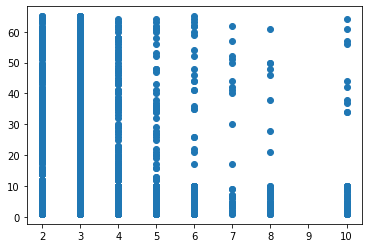

In [153]:
plt.scatter(train["Prior_purchases"], train["Discount_offered"] )

<AxesSubplot:xlabel='Weight_label', ylabel='count'>

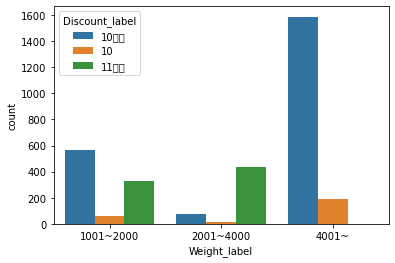

In [154]:
sns.countplot(data=train, x= "Weight_label", hue = "Discount_label")

In [155]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Warehouse_block      6999 non-null   int64   
 1   Mode_of_Shipment     6999 non-null   float64 
 2   Customer_care_calls  6999 non-null   float64 
 3   Customer_rating      6999 non-null   int64   
 4   Cost_of_the_Product  6999 non-null   int64   
 5   Prior_purchases      6999 non-null   float64 
 6   Product_importance   6999 non-null   float64 
 7   Gender               6999 non-null   int64   
 8   Discount_offered     3468 non-null   float64 
 9   Weight_in_gms        6999 non-null   float64 
 10  Reached.on.Time_Y.N  6999 non-null   int64   
 11  Weight_label         6553 non-null   category
 12  Discount_label       3468 non-null   category
 13  Cost_label           6999 non-null   category
dtypes: category(3), float64(6), int64(5)
memory usage: 935.2 KB


In [164]:
del train["Weight_label"]
del train["Discount_label"]
del train["Cost_label"]

KeyError: 'Weight_label'

In [ ]:
train["Warehouse_block"]= train["Warehouse_block"].astype("object")
train["Product_importance"]= train["Product_importance"].astype("object")
train["Gender"]= train["Gender"].astype("object")

In [ ]:
test["Warehouse_block"]= test["Warehouse_block"].astype("object")
test["Product_importance"]= test["Product_importance"].astype("object")
test["Gender"]= test["Gender"].astype("object")

In [165]:
X_train = train.dropna(axis=0)[["Weight_in_gms"]]

In [166]:
Y_train= train.dropna(axis=0)[["Discount_offered"]]

In [167]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3468 entries, 2 to 6997
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Weight_in_gms  3468 non-null   float64
dtypes: float64(1)
memory usage: 54.2 KB


In [168]:
from sklearn import linear_model

In [169]:
lin_reg = linear_model.LinearRegression()

In [170]:
del test["Weight_label"]
del test["Discount_label"]
del test["Cost_label"]

In [172]:
lin_reg_model = lin_reg.fit(X_train, Y_train)

In [173]:
Y_pre = lin_reg_model.predict(train.loc[:, ["Weight_in_gms", ]])

In [174]:
Y_pre

array([[22.26655014],
       [23.26666086],
       [ 8.13268978],
       ...,
       [20.52316649],
       [ 9.11334309],
       [ 7.64236313]])

In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   float64
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   float64
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 914.2+ KB


In [176]:
train['Discount_offered'] = np.where(train['Discount_offered'].isnull(), 
                              pd.Series(Y_pre.flatten()), 
                             train['Discount_offered'])

In [177]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   float64
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     6999 non-null   float64
 9   Weight_in_gms        6999 non-null   float64
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 914.2+ KB


In [178]:
train.corr()

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Mode_of_Shipment,1.000000,0.025844,-0.005865,0.010784,0.019796,-0.004185,-0.009433,0.005801
Customer_care_calls,0.025844,1.000000,0.014919,0.366766,0.193545,-0.048737,-0.260407,-0.085102
Customer_rating,-0.005865,0.014919,1.000000,0.006108,0.012715,-0.007536,0.007882,0.001127
Cost_of_the_Product,0.010784,0.366766,0.006108,1.000000,0.131706,-0.060484,-0.127060,-0.067933
Prior_purchases,0.019796,0.193545,0.012715,0.131706,1.000000,-0.000326,-0.177253,-0.059834
Discount_offered,-0.004185,-0.048737,-0.007536,-0.060484,-0.000326,1.000000,-0.512608,0.321573
Weight_in_gms,-0.009433,-0.260407,0.007882,-0.127060,-0.177253,-0.512608,1.000000,-0.264845
Reached.on.Time_Y.N,0.005801,-0.085102,0.001127,-0.067933,-0.059834,0.321573,-0.264845,1.000000


In [179]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   float64
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     6999 non-null   float64
 9   Weight_in_gms        6999 non-null   float64
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 914.2+ KB


In [180]:
X_test = test.dropna(axis=0)[["Weight_in_gms"]]

In [181]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 7002 to 10999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Weight_in_gms  2085 non-null   float64
dtypes: float64(1)
memory usage: 32.6 KB


In [182]:
Y_test= test.dropna(axis=0)[["Discount_offered"]]

In [183]:
Y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 7002 to 10999
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Discount_offered  2085 non-null   float64
dtypes: float64(1)
memory usage: 32.6 KB


In [184]:
lin_reg_model = lin_reg.fit(X_test, Y_test)

In [185]:
Y_pre_0 = lin_reg_model.predict(test.loc[:, ["Weight_in_gms"]])

In [186]:
Y_pre_0

array([[10.54118604],
       [23.98076663],
       [ 6.33723957],
       ...,
       [ 9.81130591],
       [20.66572445],
       [22.95322588]])

In [187]:
test["Discount_offered"].fillna(pd.Series(Y_pre_0.flatten()), inplace=True)

In [188]:
test['Discount_offered'] = np.where(test['Discount_offered'].isnull(), 
                              pd.Series(Y_pre_0.flatten()), 
                             test['Discount_offered'])

In [189]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      4000 non-null   object 
 1   Mode_of_Shipment     4000 non-null   float64
 2   Customer_care_calls  4000 non-null   float64
 3   Customer_rating      4000 non-null   int64  
 4   Cost_of_the_Product  4000 non-null   int64  
 5   Prior_purchases      4000 non-null   float64
 6   Product_importance   4000 non-null   object 
 7   Gender               4000 non-null   object 
 8   Discount_offered     4000 non-null   float64
 9   Weight_in_gms        4000 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 472.8+ KB


In [190]:
test.corr()

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Mode_of_Shipment,1.000000,-0.000101,0.014587,-0.015779,-0.022191,-0.006815,0.004750
Customer_care_calls,-0.000101,1.000000,0.009896,0.353679,0.190649,-0.023986,-0.259316
Customer_rating,0.014587,0.009896,1.000000,0.016018,0.001540,0.015795,-0.008461
Cost_of_the_Product,-0.015779,0.353679,0.016018,1.000000,0.121872,-0.036167,-0.148970
Prior_purchases,-0.022191,0.190649,0.001540,0.121872,1.000000,0.017734,-0.187539
Discount_offered,-0.006815,-0.023986,0.015795,-0.036167,0.017734,1.000000,-0.532225
Weight_in_gms,0.004750,-0.259316,-0.008461,-0.148970,-0.187539,-0.532225,1.000000


In [1360]:
train.to_csv("train_jeoncheori2.csv", index=False)

In [1361]:
test.to_csv("test_jeoncheori2.csv", index=False)

In [194]:
train.to_csv("train_jeoncheori3.csv", index=False)

In [195]:
test.to_csv("test_jeoncheori3.csv", index=False)

In [197]:
train.corr()

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Mode_of_Shipment,1.000000,0.025844,-0.005865,0.010784,0.019796,-0.004185,-0.009433,0.005801
Customer_care_calls,0.025844,1.000000,0.014919,0.366766,0.193545,-0.048737,-0.260407,-0.085102
Customer_rating,-0.005865,0.014919,1.000000,0.006108,0.012715,-0.007536,0.007882,0.001127
Cost_of_the_Product,0.010784,0.366766,0.006108,1.000000,0.131706,-0.060484,-0.127060,-0.067933
Prior_purchases,0.019796,0.193545,0.012715,0.131706,1.000000,-0.000326,-0.177253,-0.059834
Discount_offered,-0.004185,-0.048737,-0.007536,-0.060484,-0.000326,1.000000,-0.512608,0.321573
Weight_in_gms,-0.009433,-0.260407,0.007882,-0.127060,-0.177253,-0.512608,1.000000,-0.264845
Reached.on.Time_Y.N,0.005801,-0.085102,0.001127,-0.067933,-0.059834,0.321573,-0.264845,1.000000


In [186]:
discount0_train = train[(train["Discount_offered"].isnull())      
                       &(train["Weight_in_gms"]>4000) &(train["Weight_in_gms"]<=6000)].index

In [187]:
discount0_median=train[(train["Weight_in_gms"]>4000) &(train["Weight_in_gms"]<=6000)].index

In [188]:
train["Discount_offered"][discount0_median].median()

6.0

In [189]:
train["Discount_offered"][discount0_train]=6

In [190]:
discount0_test = test[(test["Discount_offered"].isnull())      
                       &(test["Weight_in_gms"]>4000) &(test["Weight_in_gms"]<=6000)].index

In [191]:
discount0_median=train[(train["Weight_in_gms"]>4000) &(train["Weight_in_gms"]<=6000)].index

In [192]:
train["Discount_offered"][discount0_median].median()

6.0

In [193]:
test["Discount_offered"][discount0_test]=6

In [194]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Warehouse_block      6999 non-null   int64   
 1   Mode_of_Shipment     6999 non-null   float64 
 2   Customer_care_calls  6999 non-null   float64 
 3   Customer_rating      6999 non-null   int64   
 4   Cost_of_the_Product  6999 non-null   int64   
 5   Prior_purchases      6999 non-null   float64 
 6   Product_importance   6999 non-null   float64 
 7   Gender               6999 non-null   int64   
 8   Discount_offered     5537 non-null   float64 
 9   Weight_in_gms        6999 non-null   float64 
 10  Reached.on.Time_Y.N  6999 non-null   int64   
 11  Weight_label         6553 non-null   category
 12  Discount_label       3468 non-null   category
 13  Cost_label           6999 non-null   category
dtypes: category(3), float64(6), int64(5)
memory usage: 935.2 KB


In [195]:
discount1_train = train[(train["Discount_offered"].isnull())      
                       &(train["Customer_care_calls"]==7)].index

In [196]:
discount1_train

Int64Index([  99,  288,  512,  590,  608,  658,  686,  815,  909,  957, 1144,
            1266, 1406, 1497, 1511, 1597, 1810, 1835, 1872, 2057, 2232, 2481,
            2485, 2535, 2900, 2939, 3138, 3350, 3504, 3626, 3740, 3925, 3929,
            4035, 4438, 4488, 4539, 4811, 4854, 4877, 5040, 5114, 5439, 5644,
            5669, 5752, 5785, 5883, 5967, 6007, 6129, 6246, 6363, 6785, 6890],
           dtype='int64', name='ID')

In [197]:
discount1_median=train[(train["Customer_care_calls"]==7)].index

In [198]:
train["Discount_offered"][discount0_median].median()

6.0

In [199]:
train["Discount_offered"][discount1_train]=5

In [200]:
discount1_test = test[(test["Discount_offered"].isnull())      
                       &(test["Customer_care_calls"]==7)].index

In [201]:
discount1_test

Int64Index([ 7014,  7067,  7206,  7420,  7593,  7769,  7813,  7832,  7835,
             7926,  7944,  7947,  8012,  8053,  8085,  8118,  8392,  8579,
             9038,  9430,  9689,  9782,  9934, 10060, 10327, 10364, 10387,
            10821, 10876, 10945],
           dtype='int64', name='ID')

In [202]:
discount1_median_test=test[(test["Customer_care_calls"]==7)].index

In [203]:
test["Discount_offered"][discount1_median_test].median()

5.0

In [204]:
test["Discount_offered"][discount1_test]=5

In [205]:
#### cost label 3

In [206]:
discount2_train = train[(train["Discount_offered"].isnull())      
                       &(train["Cost_label"]==3)].index

In [207]:
discount2_train

Int64Index([  64,  125,  189,  198,  240,  344,  457,  492,  494,  521,
            ...
            6120, 6337, 6382, 6450, 6558, 6631, 6769, 6924, 6926, 6994],
           dtype='int64', name='ID', length=112)

In [208]:
train["Discount_offered"][train["Cost_label"]==3].mean()

6.072115384615385

In [209]:
train["Discount_offered"][discount2_train]=5

In [210]:
discount2_test = test[(test["Discount_offered"].isnull())      
                       &(test["Cost_label"]==3)].index

In [211]:
discount2_test

Int64Index([ 7003,  7070,  7083,  7183,  7261,  7337,  7338,  7373,  7438,
             7486,  7502,  7519,  7559,  7692,  7725,  7783,  7928,  8004,
             8008,  8094,  8142,  8160,  8236,  8240,  8314,  8355,  8358,
             8447,  8485,  8682,  8683,  8685,  8705,  8831,  8895,  8941,
             8959,  9217,  9242,  9330,  9400,  9550,  9563,  9593,  9635,
             9637,  9647,  9669,  9715,  9790,  9807,  9845,  9893,  9929,
             9961,  9977, 10024, 10061, 10090, 10160, 10161, 10277, 10312,
            10402, 10448, 10532, 10657, 10682, 10823, 10829, 10857, 10860,
            10979],
           dtype='int64', name='ID')

In [212]:
test["Discount_offered"][test["Cost_label"]==3].median()

5.0

In [213]:
test["Discount_offered"][discount2_test]=5

In [214]:
train.corr()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,1.000000,-0.002938,0.012963,0.000712,-0.003198,-0.003772,0.000344,-0.001708,0.001506,0.002707,-0.003872
Mode_of_Shipment,-0.002938,1.000000,0.025844,-0.005865,0.010784,0.019796,0.014742,0.000511,-0.000244,-0.009433,0.005801
Customer_care_calls,0.012963,0.025844,1.000000,0.014919,0.366766,0.193545,-0.066652,0.000035,-0.140665,-0.260407,-0.085102
Customer_rating,0.000712,-0.005865,0.014919,1.000000,0.006108,0.012715,0.002123,0.006883,-0.012930,0.007882,0.001127
Cost_of_the_Product,-0.003198,0.010784,0.366766,0.006108,1.000000,0.131706,-0.048486,-0.014507,-0.105451,-0.127060,-0.067933
Prior_purchases,-0.003772,0.019796,0.193545,0.012715,0.131706,1.000000,0.013543,0.005572,-0.045996,-0.177253,-0.059834
Product_importance,0.000344,0.014742,-0.066652,0.002123,-0.048486,0.013543,1.000000,-0.013408,0.018858,0.096001,0.020316
Gender,-0.001708,0.000511,0.000035,0.006883,-0.014507,0.005572,-0.013408,1.000000,-0.000457,-0.002798,0.000378
Discount_offered,0.001506,-0.000244,-0.140665,-0.012930,-0.105451,-0.045996,0.018858,-0.000457,1.000000,-0.397188,0.327806
Weight_in_gms,0.002707,-0.009433,-0.260407,0.007882,-0.127060,-0.177253,0.096001,-0.002798,-0.397188,1.000000,-0.264845


In [215]:
test.corr()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
Warehouse_block,1.000000,-0.012041,0.019844,0.026795,-0.011246,0.000814,-0.006195,0.012877,0.005311,0.007677
Mode_of_Shipment,-0.012041,1.000000,-0.000101,0.014587,-0.015779,-0.022191,-0.016936,0.015862,-0.003659,0.004750
Customer_care_calls,0.019844,-0.000101,1.000000,0.009896,0.353679,0.190649,-0.045871,-0.010137,-0.117744,-0.259316
Customer_rating,0.026795,0.014587,0.009896,1.000000,0.016018,0.001540,0.011186,-0.019201,0.008080,-0.008461
Cost_of_the_Product,-0.011246,-0.015779,0.353679,0.016018,1.000000,0.121872,-0.044645,-0.028927,-0.095396,-0.148970
Prior_purchases,0.000814,-0.022191,0.190649,0.001540,0.121872,1.000000,0.020638,0.017251,-0.024472,-0.187539
Product_importance,-0.006195,-0.016936,-0.045871,0.011186,-0.044645,0.020638,1.000000,0.032327,-0.001887,0.082912
Gender,0.012877,0.015862,-0.010137,-0.019201,-0.028927,0.017251,0.032327,1.000000,0.025449,-0.013157
Discount_offered,0.005311,-0.003659,-0.117744,0.008080,-0.095396,-0.024472,-0.001887,0.025449,1.000000,-0.412302
Weight_in_gms,0.007677,0.004750,-0.259316,-0.008461,-0.148970,-0.187539,0.082912,-0.013157,-0.412302,1.000000


In [216]:
# 유력단서 1  2000~4000 -> 대부분 11이상 

In [217]:
discount3_train = train[(train["Discount_offered"].isnull())      
                       &(train["Weight_in_gms"]>2000) &(train["Weight_in_gms"]<=4000)].index

In [218]:
discount3_train

Int64Index([  13,   24,   29,   40,   63,   65,   77,   89,  103,  137,
            ...
            6827, 6830, 6832, 6844, 6875, 6883, 6911, 6937, 6947, 6983],
           dtype='int64', name='ID', length=491)

In [219]:
train["Discount_offered"][(train["Weight_in_gms"]>2000) &(train["Weight_in_gms"]<=4000)].median()

33.5

In [220]:
train["Discount_offered"][discount3_train]=33.5

In [221]:
train.corr()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,1.000000,-0.002938,0.012963,0.000712,-0.003198,-0.003772,0.000344,-0.001708,0.002784,0.002707,-0.003872
Mode_of_Shipment,-0.002938,1.000000,0.025844,-0.005865,0.010784,0.019796,0.014742,0.000511,-0.002760,-0.009433,0.005801
Customer_care_calls,0.012963,0.025844,1.000000,0.014919,0.366766,0.193545,-0.066652,0.000035,-0.143193,-0.260407,-0.085102
Customer_rating,0.000712,-0.005865,0.014919,1.000000,0.006108,0.012715,0.002123,0.006883,-0.019566,0.007882,0.001127
Cost_of_the_Product,-0.003198,0.010784,0.366766,0.006108,1.000000,0.131706,-0.048486,-0.014507,-0.055434,-0.127060,-0.067933
Prior_purchases,-0.003772,0.019796,0.193545,0.012715,0.131706,1.000000,0.013543,0.005572,-0.066153,-0.177253,-0.059834
Product_importance,0.000344,0.014742,-0.066652,0.002123,-0.048486,0.013543,1.000000,-0.013408,0.019148,0.096001,0.020316
Gender,-0.001708,0.000511,0.000035,0.006883,-0.014507,0.005572,-0.013408,1.000000,0.000615,-0.002798,0.000378
Discount_offered,0.002784,-0.002760,-0.143193,-0.019566,-0.055434,-0.066153,0.019148,0.000615,1.000000,-0.432175,0.395213
Weight_in_gms,0.002707,-0.009433,-0.260407,0.007882,-0.127060,-0.177253,0.096001,-0.002798,-0.432175,1.000000,-0.264845


In [222]:
discount3_test = test[(test["Discount_offered"].isnull())      
                       &(test["Weight_in_gms"]>2000) &(test["Weight_in_gms"]<=4000)].index

In [223]:
test["Discount_offered"][(test["Weight_in_gms"]>2000) &(test["Weight_in_gms"]<=4000)].median()

33.0

In [224]:
test["Discount_offered"][discount3_test]=33

In [225]:
test.corr()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
Warehouse_block,1.000000,-0.012041,0.019844,0.026795,-0.011246,0.000814,-0.006195,0.012877,0.007664,0.007677
Mode_of_Shipment,-0.012041,1.000000,-0.000101,0.014587,-0.015779,-0.022191,-0.016936,0.015862,-0.015758,0.004750
Customer_care_calls,0.019844,-0.000101,1.000000,0.009896,0.353679,0.190649,-0.045871,-0.010137,-0.123346,-0.259316
Customer_rating,0.026795,0.014587,0.009896,1.000000,0.016018,0.001540,0.011186,-0.019201,0.016905,-0.008461
Cost_of_the_Product,-0.011246,-0.015779,0.353679,0.016018,1.000000,0.121872,-0.044645,-0.028927,-0.040284,-0.148970
Prior_purchases,0.000814,-0.022191,0.190649,0.001540,0.121872,1.000000,0.020638,0.017251,-0.040415,-0.187539
Product_importance,-0.006195,-0.016936,-0.045871,0.011186,-0.044645,0.020638,1.000000,0.032327,0.014833,0.082912
Gender,0.012877,0.015862,-0.010137,-0.019201,-0.028927,0.017251,0.032327,1.000000,0.022953,-0.013157
Discount_offered,0.007664,-0.015758,-0.123346,0.016905,-0.040284,-0.040415,0.014833,0.022953,1.000000,-0.440449
Weight_in_gms,0.007677,0.004750,-0.259316,-0.008461,-0.148970,-0.187539,0.082912,-0.013157,-0.440449,1.000000


In [226]:
##  6번 전화  ---> 10퍼센트 이하 

In [227]:
discount4_train = train[(train["Discount_offered"].isnull())      
                       &(train["Customer_care_calls"]==6)].index

In [228]:
discount4_train 

Int64Index([  30,   32,   34,   55,   79,   97,  235,  355,  409,  426,  466,
             482,  484,  898,  932, 1011, 1068, 1077, 1171, 1193, 1388, 1433,
            1451, 1472, 1540, 1550, 1620, 1668, 1731, 1773, 1786, 1841, 1850,
            1879, 2005, 2042, 2191, 2271, 2293, 2318, 2449, 2482, 2487, 2516,
            2540, 2603, 2604, 2761, 2800, 3020, 3279, 3395, 3433, 3579, 3741,
            3780, 3798, 3941, 3955, 3969, 4137, 4220, 4409, 4561, 4570, 4640,
            4695, 4831, 4900, 4967, 4975, 5013, 5065, 5101, 5107, 5169, 5214,
            5228, 5422, 5424, 5480, 5527, 5529, 5608, 5642, 5653, 5803, 5834,
            5862, 5966, 6030, 6034, 6445, 6566, 6743, 6767, 6782, 6841, 6891,
            6981],
           dtype='int64', name='ID')

In [229]:
train["Discount_offered"][train["Customer_care_calls"]==6].median()

5.0

In [230]:
train["Discount_offered"][discount4_train]=5

In [231]:
discount4_test = test[(test["Discount_offered"].isnull())      
                       &(test["Customer_care_calls"]==6)].index

In [232]:
test["Discount_offered"][test["Customer_care_calls"]==6].median()

6.0

In [233]:
test["Discount_offered"][discount4_test]=6

In [234]:
### 8번 구매 or 10번 구매 --> 10프로 이하 

In [235]:
discount5_train = train[(train["Discount_offered"].isnull())      
                       &(train["Prior_purchases"]==8)].index
discount6_train = train[(train["Discount_offered"].isnull())      
                       &(train["Prior_purchases"]==10)].index

In [236]:
train["Discount_offered"][(train["Prior_purchases"]==10)].median()

6.0

In [237]:
train["Discount_offered"][discount5_train]=6
train["Discount_offered"][discount6_train]=6

In [238]:
train.corr()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,1.000000,-0.002938,0.012963,0.000712,-0.003198,-0.003772,0.000344,-0.001708,0.002307,0.002707,-0.003872
Mode_of_Shipment,-0.002938,1.000000,0.025844,-0.005865,0.010784,0.019796,0.014742,0.000511,-0.001234,-0.009433,0.005801
Customer_care_calls,0.012963,0.025844,1.000000,0.014919,0.366766,0.193545,-0.066652,0.000035,-0.153402,-0.260407,-0.085102
Customer_rating,0.000712,-0.005865,0.014919,1.000000,0.006108,0.012715,0.002123,0.006883,-0.020994,0.007882,0.001127
Cost_of_the_Product,-0.003198,0.010784,0.366766,0.006108,1.000000,0.131706,-0.048486,-0.014507,-0.058767,-0.127060,-0.067933
Prior_purchases,-0.003772,0.019796,0.193545,0.012715,0.131706,1.000000,0.013543,0.005572,-0.071064,-0.177253,-0.059834
Product_importance,0.000344,0.014742,-0.066652,0.002123,-0.048486,0.013543,1.000000,-0.013408,0.021540,0.096001,0.020316
Gender,-0.001708,0.000511,0.000035,0.006883,-0.014507,0.005572,-0.013408,1.000000,-0.000947,-0.002798,0.000378
Discount_offered,0.002307,-0.001234,-0.153402,-0.020994,-0.058767,-0.071064,0.021540,-0.000947,1.000000,-0.406760,0.391905
Weight_in_gms,0.002707,-0.009433,-0.260407,0.007882,-0.127060,-0.177253,0.096001,-0.002798,-0.406760,1.000000,-0.264845


In [239]:
discount5_test = test[(test["Discount_offered"].isnull())      
                       &(test["Prior_purchases"]==8)].index
discount6_test = test[(test["Discount_offered"].isnull())      
                       &(test["Prior_purchases"]==10)].index

In [240]:
test["Discount_offered"][discount5_test]=6
test["Discount_offered"][discount6_test]=6

In [241]:
train[train["Discount_offered"].isnull()]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Weight_label,Discount_label,Cost_label
ID,,,,,,,,,,,,,,
1,2,0.0,2.0,2,135,3.0,0.0,0,NaN,1339.0,1,1001~2000,NaN,0
6,1,0.0,4.0,5,171,3.0,0.0,1,NaN,1683.0,1,1001~2000,NaN,1
38,3,1.0,4.0,2,177,4.0,0.0,1,NaN,1233.0,1,1001~2000,NaN,1
74,4,0.0,3.0,3,178,2.0,1.0,0,NaN,1778.0,1,1001~2000,NaN,1
80,4,0.0,3.0,1,141,2.0,0.0,1,NaN,1297.0,1,1001~2000,NaN,0
112,2,0.0,3.0,2,214,4.0,1.0,1,NaN,1322.0,1,1001~2000,NaN,2
115,4,0.0,3.0,1,152,3.0,2.0,0,NaN,1464.0,1,1001~2000,NaN,0
119,3,2.0,5.0,3,222,6.0,0.0,0,NaN,1656.0,0,1001~2000,NaN,2
123,2,0.0,2.0,2,173,3.0,1.0,0,NaN,1575.0,1,1001~2000,NaN,1


In [242]:
train.corr()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,1.000000,-0.002938,0.012963,0.000712,-0.003198,-0.003772,0.000344,-0.001708,0.002307,0.002707,-0.003872
Mode_of_Shipment,-0.002938,1.000000,0.025844,-0.005865,0.010784,0.019796,0.014742,0.000511,-0.001234,-0.009433,0.005801
Customer_care_calls,0.012963,0.025844,1.000000,0.014919,0.366766,0.193545,-0.066652,0.000035,-0.153402,-0.260407,-0.085102
Customer_rating,0.000712,-0.005865,0.014919,1.000000,0.006108,0.012715,0.002123,0.006883,-0.020994,0.007882,0.001127
Cost_of_the_Product,-0.003198,0.010784,0.366766,0.006108,1.000000,0.131706,-0.048486,-0.014507,-0.058767,-0.127060,-0.067933
Prior_purchases,-0.003772,0.019796,0.193545,0.012715,0.131706,1.000000,0.013543,0.005572,-0.071064,-0.177253,-0.059834
Product_importance,0.000344,0.014742,-0.066652,0.002123,-0.048486,0.013543,1.000000,-0.013408,0.021540,0.096001,0.020316
Gender,-0.001708,0.000511,0.000035,0.006883,-0.014507,0.005572,-0.013408,1.000000,-0.000947,-0.002798,0.000378
Discount_offered,0.002307,-0.001234,-0.153402,-0.020994,-0.058767,-0.071064,0.021540,-0.000947,1.000000,-0.406760,0.391905
Weight_in_gms,0.002707,-0.009433,-0.260407,0.007882,-0.127060,-0.177253,0.096001,-0.002798,-0.406760,1.000000,-0.264845


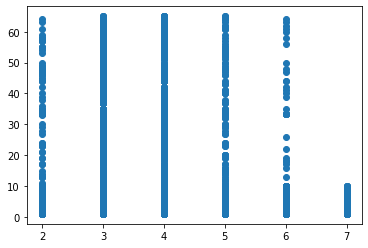

In [243]:
plt.scatter(train["Customer_care_calls"], train["Discount_offered"] )

<AxesSubplot:xlabel='Weight_label', ylabel='count'>

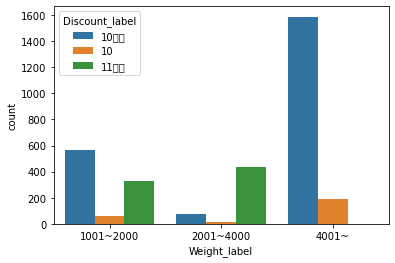

In [244]:
sns.countplot(data=train, x= "Weight_label", hue = "Discount_label")

In [245]:
pt1 =train[["Weight_label", "Customer_care_calls", "Discount_offered"]].groupby(['Weight_label',"Customer_care_calls"]).median()

In [246]:
pt1

Discount_offered
Weight_label Customer_care_calls                  
1001~2000    2.0                             23.00
             3.0                             30.00
             4.0                              9.00
             5.0                              6.00
             6.0                              5.00
             7.0                              5.00
2001~4000    2.0                             33.50
             3.0                             33.50
             4.0                             33.50
             5.0                             33.50
             6.0                             29.75
             7.0                               NaN
4001~        2.0                              6.00
             3.0                              6.00
             4.0                              6.00
             5.0                              6.00
             6.0                              6.00
             7.0                               NaN

In [247]:
discount7_train = train[(train["Discount_offered"].isnull())      
                       &(train["Weight_in_gms"]<=2000)&(train["Customer_care_calls"]==2)].index
discount8_train = train[(train["Discount_offered"].isnull())      
                       &(train["Weight_in_gms"]<=2000)&(train["Customer_care_calls"]==3)].index
discount9_train = train[(train["Discount_offered"].isnull())      
                       &(train["Weight_in_gms"]<=2000)&(train["Customer_care_calls"]==4)].index
discount10_train = train[(train["Discount_offered"].isnull())      
                       &(train["Weight_in_gms"]<=2000)&(train["Customer_care_calls"]==5)].index
discount11_train = train[(train["Discount_offered"].isnull())      
                       &(train["Weight_in_gms"]<=2000)&(train["Customer_care_calls"]==6)].index
discount12_train = train[(train["Discount_offered"].isnull())      
                       &(train["Weight_in_gms"]<=2000)&(train["Customer_care_calls"]==7)].index

In [248]:
train["Discount_offered"][discount7_train]=23
train["Discount_offered"][discount8_train]=30
train["Discount_offered"][discount9_train]=9
train["Discount_offered"][discount10_train]=6
train["Discount_offered"][discount11_train]=5
train["Discount_offered"][discount12_train]=5

In [249]:
train.corr()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,1.000000,-0.002938,0.012963,0.000712,-0.003198,-0.003772,0.000344,-0.001708,0.003338,0.002707,-0.003872
Mode_of_Shipment,-0.002938,1.000000,0.025844,-0.005865,0.010784,0.019796,0.014742,0.000511,-0.008253,-0.009433,0.005801
Customer_care_calls,0.012963,0.025844,1.000000,0.014919,0.366766,0.193545,-0.066652,0.000035,-0.201482,-0.260407,-0.085102
Customer_rating,0.000712,-0.005865,0.014919,1.000000,0.006108,0.012715,0.002123,0.006883,-0.020612,0.007882,0.001127
Cost_of_the_Product,-0.003198,0.010784,0.366766,0.006108,1.000000,0.131706,-0.048486,-0.014507,-0.103178,-0.127060,-0.067933
Prior_purchases,-0.003772,0.019796,0.193545,0.012715,0.131706,1.000000,0.013543,0.005572,-0.092248,-0.177253,-0.059834
Product_importance,0.000344,0.014742,-0.066652,0.002123,-0.048486,0.013543,1.000000,-0.013408,0.023424,0.096001,0.020316
Gender,-0.001708,0.000511,0.000035,0.006883,-0.014507,0.005572,-0.013408,1.000000,-0.000538,-0.002798,0.000378
Discount_offered,0.003338,-0.008253,-0.201482,-0.020612,-0.103178,-0.092248,0.023424,-0.000538,1.000000,-0.370716,0.389877
Weight_in_gms,0.002707,-0.009433,-0.260407,0.007882,-0.127060,-0.177253,0.096001,-0.002798,-0.370716,1.000000,-0.264845


In [250]:
pt1 =test[["Weight_label", "Customer_care_calls", "Discount_offered"]].groupby(['Weight_label',"Customer_care_calls"]).median()

In [251]:
pt1

Discount_offered
Weight_label Customer_care_calls                  
1001~2000    2.0                              18.5
             3.0                              27.0
             4.0                               9.0
             5.0                               6.0
             6.0                               6.0
             7.0                               5.0
2001~4000    2.0                              33.0
             3.0                              33.0
             4.0                              33.0
             5.0                              33.0
             6.0                              26.0
             7.0                               NaN
4001~        2.0                               6.0
             3.0                               6.0
             4.0                               6.0
             5.0                               6.0
             6.0                               6.0
             7.0                               NaN

In [252]:
discount7_test = test[(test["Discount_offered"].isnull())      
                       &(test["Weight_in_gms"]<=2000)&(test["Customer_care_calls"]==2)].index
discount8_test = test[(test["Discount_offered"].isnull())      
                       &(test["Weight_in_gms"]<=2000)&(test["Customer_care_calls"]==3)].index
discount9_test = test[(test["Discount_offered"].isnull())      
                       &(test["Weight_in_gms"]<=2000)&(test["Customer_care_calls"]==4)].index
discount10_test = test[(test["Discount_offered"].isnull())      
                       &(test["Weight_in_gms"]<=2000)&(test["Customer_care_calls"]==5)].index
discount11_test = test[(test["Discount_offered"].isnull())      
                       &(test["Weight_in_gms"]<=2000)&(test["Customer_care_calls"]==6)].index
discount12_test = test[(test["Discount_offered"].isnull())      
                       &(test["Weight_in_gms"]<=2000)&(test["Customer_care_calls"]==7)].index

In [253]:
test["Discount_offered"][discount7_test]=23
test["Discount_offered"][discount8_test]=30
test["Discount_offered"][discount9_test]=9
test["Discount_offered"][discount10_test]=6
test["Discount_offered"][discount11_test]=5
test["Discount_offered"][discount12_test]=5

In [254]:
test.corr()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
Warehouse_block,1.000000,-0.012041,0.019844,0.026795,-0.011246,0.000814,-0.006195,0.012877,-0.000667,0.007677
Mode_of_Shipment,-0.012041,1.000000,-0.000101,0.014587,-0.015779,-0.022191,-0.016936,0.015862,-0.016891,0.004750
Customer_care_calls,0.019844,-0.000101,1.000000,0.009896,0.353679,0.190649,-0.045871,-0.010137,-0.185318,-0.259316
Customer_rating,0.026795,0.014587,0.009896,1.000000,0.016018,0.001540,0.011186,-0.019201,0.010346,-0.008461
Cost_of_the_Product,-0.011246,-0.015779,0.353679,0.016018,1.000000,0.121872,-0.044645,-0.028927,-0.093235,-0.148970
Prior_purchases,0.000814,-0.022191,0.190649,0.001540,0.121872,1.000000,0.020638,0.017251,-0.070134,-0.187539
Product_importance,-0.006195,-0.016936,-0.045871,0.011186,-0.044645,0.020638,1.000000,0.032327,0.022126,0.082912
Gender,0.012877,0.015862,-0.010137,-0.019201,-0.028927,0.017251,0.032327,1.000000,0.023265,-0.013157
Discount_offered,-0.000667,-0.016891,-0.185318,0.010346,-0.093235,-0.070134,0.022126,0.023265,1.000000,-0.376306
Weight_in_gms,0.007677,0.004750,-0.259316,-0.008461,-0.148970,-0.187539,0.082912,-0.013157,-0.376306,1.000000


In [255]:
train.corr()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,1.000000,-0.002938,0.012963,0.000712,-0.003198,-0.003772,0.000344,-0.001708,0.003338,0.002707,-0.003872
Mode_of_Shipment,-0.002938,1.000000,0.025844,-0.005865,0.010784,0.019796,0.014742,0.000511,-0.008253,-0.009433,0.005801
Customer_care_calls,0.012963,0.025844,1.000000,0.014919,0.366766,0.193545,-0.066652,0.000035,-0.201482,-0.260407,-0.085102
Customer_rating,0.000712,-0.005865,0.014919,1.000000,0.006108,0.012715,0.002123,0.006883,-0.020612,0.007882,0.001127
Cost_of_the_Product,-0.003198,0.010784,0.366766,0.006108,1.000000,0.131706,-0.048486,-0.014507,-0.103178,-0.127060,-0.067933
Prior_purchases,-0.003772,0.019796,0.193545,0.012715,0.131706,1.000000,0.013543,0.005572,-0.092248,-0.177253,-0.059834
Product_importance,0.000344,0.014742,-0.066652,0.002123,-0.048486,0.013543,1.000000,-0.013408,0.023424,0.096001,0.020316
Gender,-0.001708,0.000511,0.000035,0.006883,-0.014507,0.005572,-0.013408,1.000000,-0.000538,-0.002798,0.000378
Discount_offered,0.003338,-0.008253,-0.201482,-0.020612,-0.103178,-0.092248,0.023424,-0.000538,1.000000,-0.370716,0.389877
Weight_in_gms,0.002707,-0.009433,-0.260407,0.007882,-0.127060,-0.177253,0.096001,-0.002798,-0.370716,1.000000,-0.264845


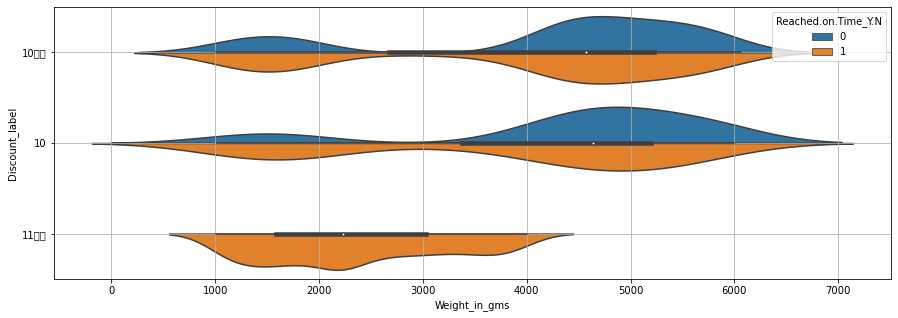

In [267]:
plt.figure(figsize=(15,5))
sns.violinplot(data =train, 
               x= "Weight_in_gms", 
               y= "Discount_label",
               hue="Reached.on.Time_Y.N",
               split=True)
plt.grid()
plt.show()

In [269]:
train.to_csv("train_jeoncheori1.csv", index=False)

In [270]:
test.to_csv("test_jeoncheori1.csv", index=False)

In [276]:
train1["Prior_purchases"]=train1["Prior_purchases"].astype("int64")
train1["Product_importance"]=train1["Product_importance"].astype("int64")
train1["Customer_care_calls"]=train1["Customer_care_calls"].astype("int64")
train1["Discount_offered"]=train1["Discount_offered"].astype("int64")
train1["Weight_in_gms"]=train1["Weight_in_gms"].astype("int64")
train1["Mode_of_Shipment"]=train1["Mode_of_Shipment"].astype("object")
train1["Warehouse_block"]=train1["Warehouse_block"].astype("object")
train1["Product_importance"]=train1["Product_importance"].astype("object")

In [278]:
test1["Prior_purchases"]=test1["Prior_purchases"].astype("int64")
test1["Product_importance"]=test1["Product_importance"].astype("int64")
test1["Customer_care_calls"]=test1["Customer_care_calls"].astype("int64")
test1["Discount_offered"]=test1["Discount_offered"].astype("int64")
test1["Weight_in_gms"]=test1["Weight_in_gms"].astype("int64")
test1["Mode_of_Shipment"]=test1["Mode_of_Shipment"].astype("object")
test1["Warehouse_block"]=test1["Warehouse_block"].astype("object")
test1["Product_importance"]=test1["Product_importance"].astype("object")

In [285]:
# X_train1 범주형 원핫 인코딩 
for fi_name in select_fi:
    dummy= pd.get_dummies(train1[fi_name], prefix= fi_name)
    X_train1 = pd.concat([X_train1, dummy], axis=1)
    X_train1.drop(fi_name, axis=1, inplace=True)


In [286]:
# X_test1 범주형 원핫 인코딩 
for fi_name in select_fi:
    dummy= pd.get_dummies(test1[fi_name], prefix= fi_name)
    X_test1 = pd.concat([X_test1, dummy], axis=1)
    X_test1.drop(fi_name, axis=1, inplace=True)

In [287]:
# 스케일링 진행 라이브러리 불러오기 
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()

In [288]:
scaler.fit(X_train1)

StandardScaler()

In [289]:
scaler.fit(X_test1)

StandardScaler()

In [290]:
transform_X_train1 = scaler.transform(X_train1)
transform_X_train1

array([[-1.93571316, -0.69153602, -1.58034391, ...,  1.02378273,
        -0.85358565, -0.3149652 ],
       [ 0.87509976,  0.01321406,  0.30498931, ...,  1.02378273,
        -0.85358565, -0.3149652 ],
       [-0.99877552, -1.3962861 ,  0.38878189, ...,  1.02378273,
        -0.85358565, -0.3149652 ],
       ...,
       [ 1.8120374 , -1.3962861 ,  1.87610032, ...,  1.02378273,
        -0.85358565, -0.3149652 ],
       [-0.99877552, -1.3962861 ,  0.45162633, ..., -0.97676975,
         1.17152859, -0.3149652 ],
       [-0.99877552,  0.01321406,  1.08007074, ..., -0.97676975,
        -0.85358565,  3.17495392]])

In [291]:
transform_X_test1 = scaler.transform(X_test1)
transform_X_test1

array([[-0.99877552, -1.3962861 ,  1.3314485 , ..., -0.97676975,
        -0.85358565,  3.17495392],
       [-0.99877552,  0.71796415, -1.55939576, ..., -0.97676975,
         1.17152859, -0.3149652 ],
       [-0.06183788,  1.42271423, -1.47560317, ...,  1.02378273,
        -0.85358565, -0.3149652 ],
       ...,
       [-0.06183788,  0.01321406, -0.09302548, ..., -0.97676975,
         1.17152859, -0.3149652 ],
       [ 1.8120374 ,  0.71796415,  0.93343371, ...,  1.02378273,
        -0.85358565, -0.3149652 ],
       [ 0.87509976, -1.3962861 ,  0.87058927, ...,  1.02378273,
        -0.85358565, -0.3149652 ]])